Kumpulan data Netflix ini memiliki informasi film dan acara TV hingga tahun 2021, kumpulan data tersedia di Kaggle.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [3]:
#import dataset
netflix_data = pd.read_csv("/content/Netflix Dataset.csv")

In [4]:
#view data
netflix_data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Data Wrangling

In [6]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix_data.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
netflix_data.shape

(7789, 11)

In [9]:
netflix_data.size

85679

In [11]:
netflix_data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [14]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Data cleaning

Finding the duplicate records and null values

In [15]:
netflix_data.duplicated() #function to find duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7789, dtype: bool



*   This function only retuned the top 5 rows and the bottom 5 rows its has not give the necessary information required to dictect the duplicate values in a dataset



In [17]:
netflix_data[netflix_data.duplicated()] #This fomular will only give data that contain duplicate values

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...




*   There are only 2 duplicats found in this data set



In [18]:
netflix_data.drop_duplicates(inplace = True)
#this function removes duplicate values, using this alone 'NET_data.drop_duplicates()' cannot permanently remove the duplicte values, adding (inplace =true) will get it done

In [19]:
#verify that duplicate values has been removed
netflix_data.shape

(7787, 11)



*   
Perviously the rows were 7789 in total now they are 7787.





**Finding Null Values**

In [20]:

#Using isnull function will return the a series of boolean values to confirm null areas
netflix_data.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [21]:
netflix_data.isnull().sum() #this will generate the total of null values in the dataset

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

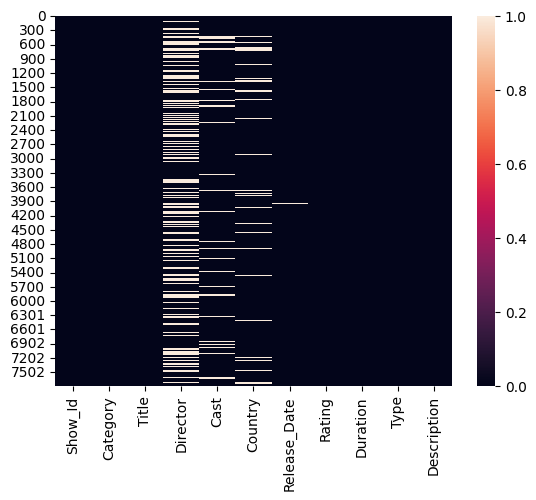

In [22]:
#using seaborn to vizualize the nullvalues in the data set
import matplotlib.pyplot as plt
sns.heatmap(netflix_data.isnull())
plt.show()


For house of cards,Find the show id and the show's Director

In [23]:
netflix_data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [24]:
netflix_data[netflix_data['Title'].isin(['House of Cards'])]    #Using the isin() statement to filter the key word

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [25]:
netflix_data[netflix_data['Title'].str.contains('House of Cards')]    #Using the str.contains() to filter key word

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...



What year were the higest no. of shows and movie released?

In [26]:
netflix_data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [42]:
netflix_data['Release_Date'] = pd.to_datetime(netflix_data['Release_Date'], errors='coerce')


In [43]:
pd.to_datetime(netflix_data['Release_Date']) #convert release columns into Datetime

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7784   2020-10-19
7785   2019-03-02
7786   2020-09-25
7787   2020-10-31
7788   2020-03-01
Name: Release_Date, Length: 7787, dtype: datetime64[ns]

In [44]:
netflix_data.dtypes #verify

Show_Id                  object
Category                 object
Title                    object
Director                 object
Cast                     object
Country                  object
Release_Date     datetime64[ns]
Rating                   object
Duration                 object
Type                     object
Description              object
Date_Released    datetime64[ns]
dtype: object

In [45]:
netflix_data['Release_Date'].dt.year.value_counts()

Release_Date
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64



*   Year 2019 has the highest number of movies and show realeses with 2153 in total



**Using a Bar Chart**

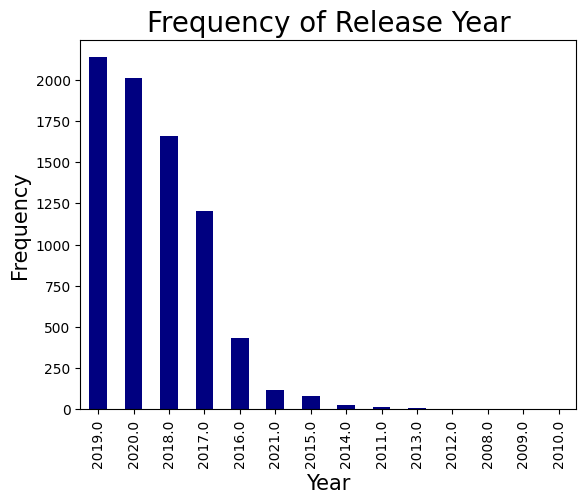

In [48]:
netflix_data['Release_Date'].dt.year.value_counts().plot(kind ='bar', color= 'navy')
plt.title("Frequency of Release Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

In [49]:
netflix_data.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

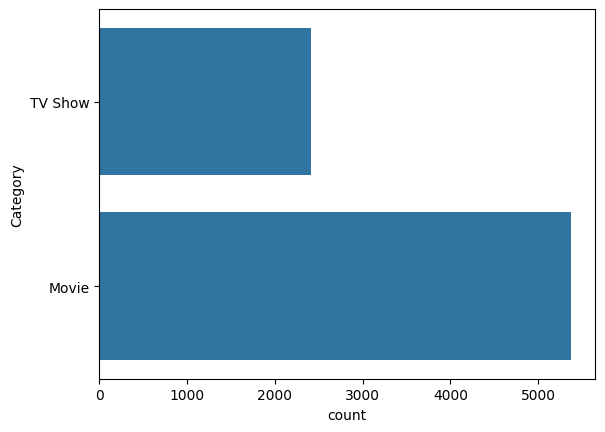

In [52]:
sns.countplot(netflix_data['Category'])

In [53]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01



What movies where released in year 2000?

In [54]:
netflix_data['Years']= netflix_data['Release_Date'].dt.year

In [55]:
netflix_data [(netflix_data['Category']== 'Movie') & (netflix_data['Years']== 2015)]  #Filtering

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
128,s129,Movie,6 Years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",United States,2015-09-08,TV-MA,80 min,"Dramas, Independent Movies, Romantic Movies",As a volatile young couple who have been toget...,2015-09-08,2015.0
247,s248,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015-12-04,TV-14,57 min,"Comedies, Music & Musicals",Bill Murray rounds up an all-star cast for an ...,2015-12-04,2015.0
316,s317,Movie,Advantageous,Jennifer Phang,"Jacqueline Kim, James Urbaniak, Freya Adams, K...",United States,2015-06-23,TV-MA,92 min,"Dramas, Independent Movies, Sci-Fi & Fantasy",In order to keep her job at a biomedical engin...,2015-06-23,2015.0
535,s536,Movie,Anjelah Johnson: Not Fancy,Jay Karas,Anjelah Johnson-Reyes,United States,2015-10-02,TV-14,64 min,Stand-Up Comedy,"The actress, comedian and YouTube sensation ri...",2015-10-02,2015.0
551,s552,Movie,Anthony Jeselnik: Thoughts and Prayers,Adam Dubin,Anthony Jeselnik,United States,2015-10-16,TV-MA,59 min,Stand-Up Comedy,There's no subject too dark as the comedian sk...,2015-10-16,2015.0
648,s649,Movie,Aziz Ansari Live at Madison Square Garden,Aziz Ansari,Aziz Ansari,United States,2015-03-06,TV-MA,58 min,Stand-Up Comedy,"Stand-up comedian and TV star Aziz Ansari (""Pa...",2015-03-06,2015.0
785,s786,Movie,Beasts of No Nation,Cary Joji Fukunaga,"Idris Elba, Abraham Attah, Kurt Egyiawan, Jude...",United States,2015-10-16,TV-MA,137 min,"Dramas, Independent Movies","When civil war tears his family apart, a young...",2015-10-16,2015.0
1013,s1014,Movie,Bob's Broken Sleigh,Jay Surridge,"Cole Howard, Bruce Greenwood, Victor Garber, M...",Canada,2015-12-17,TV-G,47 min,Children & Family Movies,"An overly eager elf improves Santa's sleigh, b...",2015-12-17,2015.0
1352,s1353,Movie,Chris D'Elia: Incorrigible,Bill D'Elia,Chris D'Elia,United States,2015-04-17,TV-MA,84 min,Stand-Up Comedy,Stand-up comedian Chris D'Elia covers everythi...,2015-04-17,2015.0
1357,s1358,Movie,Chris Tucker Live,Phil Joanou,Chris Tucker,United States,2015-07-10,TV-MA,92 min,Stand-Up Comedy,"Filmed in his hometown of Atlanta, Chris Tucke...",2015-07-10,2015.0



Titles of TV shows realsed in France.

In [56]:
netflix_data [(netflix_data['Category']== 'TV Show') & (netflix_data['Country']== 'France')] #Filtering

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
248,s249,TV Show,A Very Secret Service,NaN,"Hugo Becker, Wilfred Benaïche, Christophe Kour...",France,2018-07-30,TV-MA,2 Seasons,"International TV Shows, TV Comedies","At the height of the Cold War in 1960, André M...",2018-07-30,2018.0
303,s304,TV Show,Ad Vitam,NaN,"Yvan Attal, Garance Marillier, Niels Schneider...",France,2019-11-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",In a future where regeneration technology lets...,2019-11-01,2019.0
1180,s1181,TV Show,Call My Agent!,NaN,"Camille Cottin, Thibault De Montalembert, Grég...",France,2019-01-04,TV-MA,3 Seasons,"International TV Shows, TV Comedies, TV Dramas","At a top Paris talent firm, agents scramble to...",2019-01-04,2019.0
1201,s1202,TV Show,Cannabis,NaN,"Jean-Michel Correia, Yasin Houicha, Pedro Casa...",France,2016-12-15,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When a huge marijuana shipment falls prey to t...,2016-12-15,2016.0
1536,s1537,TV Show,Crime Time,NaN,"Augusto Madeira, Érico Brás, Gustavo Machado, ...",France,2019-01-31,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Born into poverty and trapped in a grim job as...,2019-01-31,2019.0
1933,s1934,TV Show,Einsatzgruppen: The Nazi Death Squads,NaN,Paul Bandey,France,2016-11-10,TV-MA,1 Season,"Docuseries, International TV Shows",This documentary series examines the Einsatzgr...,2016-11-10,2016.0
2105,s2106,TV Show,Family Business,NaN,"Jonathan Cohen, Gérard Darmon, Julia Piaton, L...",France,2020-09-11,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",After learning France is about to legalize pot...,2020-09-11,2020.0
2117,s2118,TV Show,Fary : Hexagone,"Adrien Lagier, Ousmane Ly",Fary,France,2020-04-16,TV-MA,2 Seasons,"International TV Shows, Stand-Up Comedy & Talk...",French comedy phenom Fary puts a playful spin ...,2020-04-16,2020.0
2543,s2544,TV Show,Grizzy et les Lemmings,NaN,"Pierre-Alain de Garrigues, Josselin Charier",France,2020-12-12,TV-Y,2 Seasons,"Kids' TV, TV Comedies","Strong, whip-smart Grizzy rules a Canadian for...",2020-12-12,2020.0
2563,s2564,TV Show,H,NaN,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,2020-09-01,TV-MA,4 Seasons,"International TV Shows, TV Comedies","At a dysfunctional hospital in Paris, three bu...",2020-09-01,2020.0


In [57]:
netflix_data [(netflix_data['Category']== 'TV Show') & (netflix_data['Country']== 'France')] ['Title'] #filtering Titles only

248                     A Very Secret Service
303                                  Ad Vitam
1180                           Call My Agent!
1201                                 Cannabis
1536                               Crime Time
1933    Einsatzgruppen: The Nazi Death Squads
2105                          Family Business
2117                          Fary : Hexagone
2543                   Grizzy et les Lemmings
2563                                        H
3002                        Inhuman Resources
3498                                 La Mante
3502                            La Révolution
3941                                 Marianne
3952                                Marseille
4113                                Mini Wolf
4167                                   Molang
4228                                   Mortel
4377                              Mythomaniac
4387                        Nailed It! France
4540             November 13: Attack on Paris
4582                 Oggy and the 

Top 10 Directors with the highest no. of realised TV shows and Movies on Netflix

In [59]:
netflix_data['Director'].value_counts().head(10)     #using value count function and added head(10) to limit output to 10

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

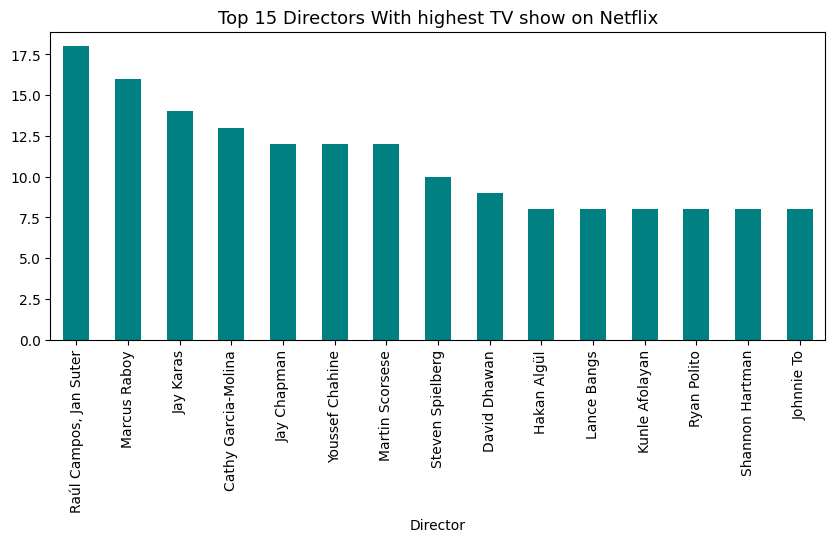

In [60]:
#Plot the bar chart
plt.figure(figsize=(10,4))
netflix_data['Director'].value_counts().head(15).plot(kind='bar', color='Teal').set_title('Top 15 Directors With highest TV show on Netflix', fontsize=13)
plt.show()


Show data, where Categories, Type and country columns are equal to movie, comedy and united kingdom respectivly

In [61]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [62]:
N_data =netflix_data.dropna()

In [63]:
netflix_data [(netflix_data['Category']== 'Movies') &(netflix_data['Type']== 'Comedies') | (netflix_data['Country']== 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
85,s86,TV Show,21 Again,NaN,Laura Morgan,United Kingdom,2020-07-01,TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s...",2020-07-01,2020.0
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,2018-05-01,TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018-05-01,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0



How many movies and TVshows was Tom Curies cast in?

In [64]:
N_data [N_data['Cast'].str.contains('Tom Cruise') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0



What are the diffrent ratings defined by Netflix?

In [66]:
netflix_data.Rating.nunique()

14


How Many movies have the 'TV-14' rating in Canada?

In [67]:
netflix_data.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [68]:
netflix_data[(netflix_data['Category'] == 'Movies') & (netflix_data['Rating'] == 'TV-14') ].shape

(0, 13)

In [69]:
filtered_data = netflix_data[(netflix_data['Rating']== 'TV-14') & (netflix_data['Country']== 'Canada')]
print(filtered_data.shape[0])

23



How Many TV Shows has the "R" Rating after 2018?

In [70]:
netflix_data [(netflix_data['Rating']== 'R') &(netflix_data['Years']< 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years
74,s75,Movie,1898: Our Last Men in the Philippines,Salvador Calvo,"Luis Tosar, Javier Gutiérrez, Álvaro Cervantes...",Spain,2017-06-02,R,130 min,"Dramas, International Movies","While Spain relinquishes its last colonies, a ...",2017-06-02,2017.0
120,s121,Movie,5 to 7,Victor Levin,"Anton Yelchin, Bérénice Marlohe, Olivia Thirlb...",United States,2017-03-16,R,97 min,"Comedies, Dramas, Romantic Movies",A young novelist's life is turned upside down ...,2017-03-16,2017.0
190,s191,Movie,A Kind of Murder,Andy Goddard,"Patrick Wilson, Jessica Biel, Vincent Kartheis...",United States,2017-05-01,R,96 min,Thrillers,"Obsessed with an unsolved murder case, a crime...",2017-05-01,2017.0
599,s600,Movie,Asoka,Santosh Sivan,"Shah Rukh Khan, Kareena Kapoor, Danny Denzongp...",India,2017-03-15,R,168 min,"Action & Adventure, Dramas, International Movies",This elaborate Bollywood epic dramatizes one m...,2017-03-15,2017.0
629,s630,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017-09-08,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,s7423,Movie,Vincent N Roxxy,Gary Michael Schultz,"Emile Hirsch, Zoë Kravitz, Emory Cohen, Zoey D...",United States,2017-09-02,R,101 min,"Dramas, Thrillers","In rural Louisiana, a terse loner forges a red...",2017-09-02,2017.0
7529,s7528,Movie,Welcome to New York,Abel Ferrara,"Gérard Depardieu, Jacqueline Bisset, Marie Mou...","United States, France",2017-03-23,R,108 min,"Dramas, Independent Movies",A lecherous World Bank official sees his reput...,2017-03-23,2017.0
7591,s7590,Movie,While We're Young,Noah Baumbach,"Ben Stiller, Naomi Watts, Adam Driver, Amanda ...",United States,2017-10-23,R,97 min,"Comedies, Dramas, Independent Movies",A documentary filmmaker struggling with a crea...,2017-10-23,2017.0
7689,s7688,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States",2017-06-22,R,81 min,Horror Movies,This four-part anthology of short horror films...,2017-06-22,2017.0



Find the maximum duration of a Movie or Show in Netflix.

In [71]:
netflix_data['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [72]:
netflix_data[['Minutes','Unit']]=netflix_data['Duration'].str.split(' ', expand = True)

In [73]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min


In [74]:
netflix_data['Minutes'].max()

'99'


What Country has the highest no. of TV shows

In [75]:
netflix_data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min


In [76]:
netflix_dataTV=netflix_data[netflix_data['Category']== 'TV Show']

In [77]:
netflix_dataTV.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0,1,Season


In [78]:
netflix_dataTV['Country'].value_counts()

Country
United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: count, Length: 183, dtype: int64

In [79]:
netflix_dataTV['Country'].value_counts().head()

Country
United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: count, dtype: int64

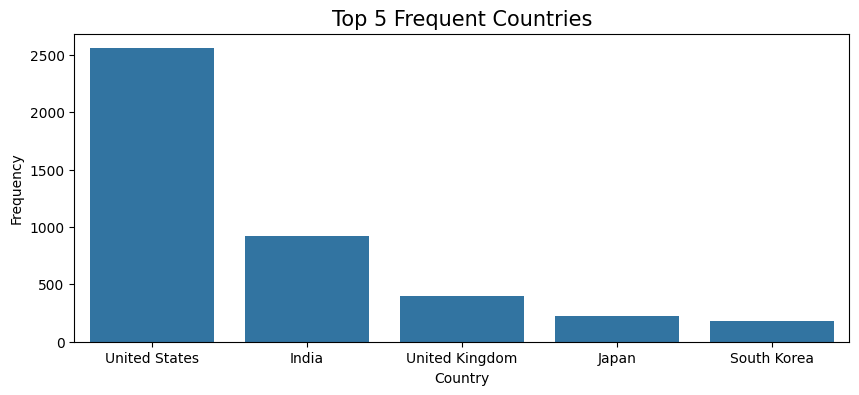

In [80]:
#Plot Bar
plt.figure(figsize=(10,4))
sns.countplot(x='Country', data=netflix_data, order=netflix_data['Country'].value_counts().head().index)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 5 Frequent Countries", fontsize=15)
plt.show()


Sort the Dataset by year

In [81]:
netflix_data.sort_values(by = 'Years').head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years,Minutes,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008.0,1,Season


In [82]:
netflix_data.sort_values(by = 'Years', ascending = False).head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Released,Years,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2021-01-01,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,2021-01-01,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min
